## Island Hopping

A politician visiting a chain of islands to canvas support - being callow, the politician uses a simple rule to determine which island to visit next. 

- Each day, the politician chooses a neighboring island and compares the populations there with the population of the current island. 
- If the neighboring island has a larger population, the politician goes over. 
- If the neighboring island has a smaller population, then the politician visits with probability \begin{equation} p=\frac{p_{neighbor}}{p_{current}}; \end{equation} otherwise the politician stays on the same island. 

After doing this for many days, the politician will end up spending time on each island proportional to the population of each island.

In other words, estimating the distribution of island populations correctly. How a simple comparison of only two states at a time can lead to accurate estimation of a probability density?

In [1]:
import numpy as np
import seaborn as sns

def make_islands(n, low=10, high=101):
    islands = np.random.randint(low, high, n+2)
    islands[0] = 0
    islands[-1] = 0
    return islands

def hop(islands, start=1, niter=1000):
    pos = start
    pop = islands[pos]
    thetas = np.zeros(niter+1, dtype='int')
    thetas[0] = pos
    for i in range(niter):
        # generate sample from proposal distribution
        k = np.random.choice([-1, 1], 1)
        next_pos = pos + k
        # evaluate unnormalized target distribution at proposed position
        next_pop = islands[next_pos]
        # calculate acceptance probability
        p = min(1, next_pop/pop)
        # use uniform random to decide accept/reject proposal
        if np.random.random() < p:
            pos = next_pos
            pop = next_pop
        thetas[i+1] = pos
    return thetas

islands = make_islands(10)
thetas = hop(islands, start=1, niter=10000)

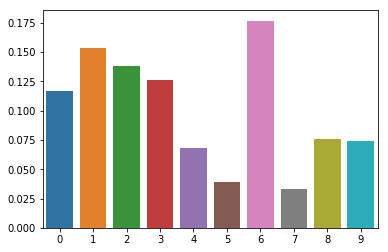

In [2]:
# True population proportions
data = islands[1:-1]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data)
pass

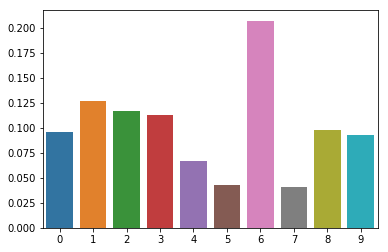

In [3]:
# Estimated population proportions
data = np.bincount(thetas)[1:]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data)
pass

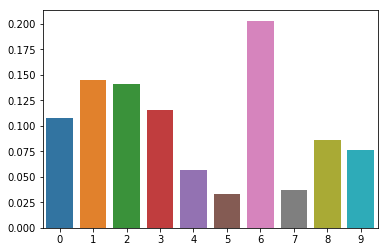

In [4]:
# Generic Metropolis scheme
def metroplis(start, target, proposal, niter, nburn=0):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current)
        p = min(target(proposed)/target(current), 1)
        if np.random.random() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

target = lambda x: islands[x]
proposal = lambda x: x + np.random.choice([-1, 1])
post = metroplis(1, target, proposal, 2000)
data = np.bincount(post)[1:]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data)
pass